Importing required libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

from tqdm import notebook

plt.style.use('ggplot')

**Loading dataset from my google drive**
> When prompted, click on the link to get authentication to allow Google to access your Drive. You should see a screen with “Google Cloud SDK wants to access your Google Account” at the top. After you allow permission, copy the given verification code and paste it in the box in Colab.

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Once you have completed verification, go to the CSV file in Google Drive, right-click on it and select “Get shareable link”. The link will be copied into your clipboard. Paste this link into a string variable in Colab.

In [0]:
link = "https://drive.google.com/open?id=1-4kayelqVCPoy_9VbRvNEtpcJDz_1Qx7"

What you want is the id portion after the equal sign. To get that portion, type in the following code:

In [4]:
fluff, id = link.split('=')
print(id)

1-4kayelqVCPoy_9VbRvNEtpcJDz_1Qx7


Finally, type in the following code to get the file into a dataframe

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('wine_quality.csv')  
wine = pd.read_csv('wine_quality.csv')

Checking all columns after loading the data from the drive

In [6]:
wine.columns

Index(['Unnamed: 0', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'type', 'quality_label'],
      dtype='object')

Drop the extra column named 'Unnamed: 0'

In [0]:
wine = wine.drop(['Unnamed: 0'], axis=1)

Replacing the 'quality_label' column values
* low to 0
* medium to 1
* high to 2


In [0]:
wine = wine.replace(to_replace=['low','medium','high'], value=[0,1,2])

Checking frequency of each quality label

In [9]:
wine['quality_label'].value_counts()

1    3915
0    2384
2     198
Name: quality_label, dtype: int64

Storing all attributes in features variable

In [0]:
features = wine.values[:,:12]

**Noramlization of features**
> Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [0]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

**Principal Component Analysis (PCA)**
> Linear dimensionality reduction using *Singular Value Decomposition* of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

In [0]:
pca = PCA(n_components=0.9)
reduced_features = pca.fit_transform(scaled_features)

Storing 'quality_label' in target variable

In [0]:
target = wine['quality_label'].values

**One Hot Encoding**
> Encode categorical features as a one-hot numeric array. The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse parameter).

In [0]:
encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_targets = encoder.fit_transform(target.reshape(-1,1)).toarray()

**Neural Networks**
> Neural networks are multi-layer networks of neurons (the blue and magenta nodes in the chart below) that we use to classify things, make predictions, etc. Below is the diagram of a simple neural network with five inputs, 5 outputs, and two hidden layers of neurons.
![Neural network with two hidden layers](https://miro.medium.com/max/796/1*yGMk1GSKKbyKr_cMarlWnA.jpeg)
Starting from the left, we have:
1. The input layer of our model in orange.
2. Our first hidden layer of neurons in blue.
3. Our second hidden layer of neurons in magenta.
4. The output layer (a.k.a. the prediction) of our model in green.

For complete understanding of neural networks [Click here!](https://towardsdatascience.com/understanding-neural-networks-19020b758230)

**Activation Functions**:


1.   *Sigmoid Activation Function* : It is a activation function of form f(x) = 1 / 1 + exp(-x) . Its Range is between 0 and 1. It is a S — shaped curve. It is easy to understand and apply but it has major reasons which have made it fall out of popularity - 
> * Vanishing gradient problem 
  * Secondly , its output isn’t zero centered. It makes the gradient updates go too far in different directions. 0 < output < 1, and it makes optimization harder.
  * Sigmoids saturate and kill gradients.
  * Sigmoids have slow convergence.
2.   *Hyperbolic Tangent function- Tanh* : It’s mathamatical formula is f(x) = 1 — exp(-2x) / 1 + exp(-2x). Now it’s output is zero centered because its range in between -1 to 1 i.e -1 < output < 1 . Hence optimization is easier in this method hence in practice it is always preferred over Sigmoid function . But still it suffers from Vanishing gradient problem.
3. *ReLu- Rectified Linear Units* : It has become very popular in the past couple of years. It was recently proved that it had 6 times improvement in convergence from Tanh function. It’s just R(x) = max(0,x) i.e if x < 0 , R(x) = 0 and if x >= 0 , R(x) = x. Hence as seeing the mathamatical form of this function we can see that it is very simple and efficinent . A lot of times in Machine learning and computer science we notice that most simple and consistent techniques and methods are only preferred and are best. Hence it avoids and rectifies vanishing gradient problem.
> But its limitation is that it should only be used within Hidden layers of a Neural Network Model. Another problem with ReLu is that some gradients can be fragile during training and can die. It can cause a weight update which will makes it never activate on any data point again. Simply saying that ReLu could result in Dead Neurons. To fix this problem another modification was introduced called *Leaky ReLu* to fix the problem of dying neurons. It introduces a small slope to keep the updates alive.



In [0]:
# Sigmoid Function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def dsigmoid(x):
  return x * (1 - x)

# Rectified Linear Unit Function
def relu(x):
  return abs(x) * (x > 0)

def drelu(x):
  return 1. * (x > 0.)

# Leaky-Relu Function
def lrelu(x):
  return np.where(x > 0., x, x * 0.01)

def dlrelu(x):
  dx = np.ones_like(x)
  dx[x < 0.] = 0.01
  return dx

# Hyperbolic Tan Function
def tanh(x):
  return np.tanh(x)

def dtanh(x):
  return 1.0 - (np.power(np.tanh(x), 2))

**Forward propagation**
> Forward propagation is the process of moving forward through the neural network (from inputs to the ultimate output or prediction). The objective of forward propagation is to calculate the activations at each neuron for each successive hidden layer until we arrive at the output.

In our network here, we have only one hidden layer which is activated using the hyperbolic tan function and the output layer is activated using the sigmoid function.

In [0]:
def feed_forward(input_data, w0, w1):
  layer0 = input_data
  layer1 = tanh(np.dot(layer0, w0))
  layer2 = sigmoid(np.dot(layer1, w1))

  return layer0, layer1, layer2

**Back propagation**
> Back propagation is the reverse of forward propagation. It allows us to calculate the error attributable to each neuron and that in turn allows us to calculate the partial derivatives and ultimately the gradient so that we can utilize gradient descent.

In [0]:
def back_propagate(layer0, layer1, layer2, w0, w1, output_data, learning_rate):
  l2_error = layer2 - output_data
  l2_delta = l2_error * dsigmoid(layer2)
  dh2 = np.dot(layer1.T, l2_delta)

  l1_error = l2_delta.dot(w1.T)
  l1_delta = l1_error * dtanh(layer1)
  dh1 = np.dot(layer0.T, l1_delta)

  w0 = w0 - (dh1 * learning_rate)
  w1 = w1 - (dh2 * learning_rate)

  return w0, w1

Predict accuracy function

In [0]:
def accuracy(X, Y):
  l0, l1, l2 = feed_forward(X, w0, w1)
  y_pred = np.argmax(l2, axis=1)
  y_true = np.argmax(Y, axis=1)
  return accuracy_score(y_true, y_pred)*100

Get model description function

In [0]:
def model_descr(weights):
  total = 0
  print("Weight ip-op", "Layer shape", "Layer parameters", sep="\t")
  for i, l in enumerate(weights):
    params = l.shape[0]*l.shape[1]
    # l.shape[0] gives row shape and l.shape[1] gives column shape
    total += params
    print(f"Layer {i}-{i+1}", l.shape, params, sep="\t")

  print("\nTotal trainable parameters: ", total)

Splitting dataset for training and testing

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(reduced_features, one_hot_targets, test_size=0.3)

In [94]:
print(len(xtrain))
input_nodes = len(xtrain[0])
print(input_nodes)

4547
7


Defining weights

In [0]:
np.random.seed(1)

w0 = np.random.random((input_nodes, 90))
w1 = np.random.random((90, 3))

Defining learning rate and iterations

In [0]:
learning_rate = 0.01
iterations = 10000

Printing model description

In [97]:
model_descr([w0,w1])

Weight ip-op	Layer shape	Layer parameters
Layer 0-1	(7, 90)	630
Layer 1-2	(90, 3)	270

Total trainable parameters:  900


Training the model

In [98]:
# Initializing variables to track Loss vs. Iterations and Accuracy vs. Iterations
tloss = 0
vloss = 0
train_loss = []
val_loss = []

tacc = 0
vacc = 0
train_acc = []
val_acc = []

iters1 = []
iters2 = []

for i in notebook.tqdm(range(iterations)):

  # Training model
  layer0, layer1, layer2 = feed_forward(xtrain, w0, w1)
  w0, w1 = back_propagate(layer0, layer1, layer2, w0, w1, ytrain, learning_rate)

  if i%10==0:
    l0, l1, l2 = feed_forward(xtest, w0, w1)
    tloss = np.mean(np.abs(layer2 - ytrain)) # Collect train loss values
    vloss = np.mean(np.abs(l2 - ytest))      # Collect validation loss values

    # Append for plotting Loss vs. Iterations
    train_loss.append(tloss)
    val_loss.append(vloss)
    iters1.append(int(i))

  if i%1000==0:
    tacc = accuracy(xtrain, ytrain)
    vacc = accuracy(xtest, ytest)
    print("Train Loss: %.5f | Validation Loss: %.5f | Training Accuracy: %.5f | Testing Accuracy: %.5f" %(tloss, vloss, tacc, vacc))

    # Append for plotting Accuracy vs. Iterations
    train_acc.append(tacc)
    val_acc.append(vacc)
    iters2.append(int(i))

Train Loss: 0.49384 | Validation Loss: 0.48349 | Training Accuracy: 67.09919 | Testing Accuracy: 65.84615
Train Loss: 0.08442 | Validation Loss: 0.08314 | Training Accuracy: 95.99736 | Testing Accuracy: 95.74359
Train Loss: 0.07462 | Validation Loss: 0.07427 | Training Accuracy: 96.19529 | Testing Accuracy: 95.84615
Train Loss: 0.07158 | Validation Loss: 0.07180 | Training Accuracy: 96.34924 | Testing Accuracy: 96.15385
Train Loss: 0.07614 | Validation Loss: 0.07023 | Training Accuracy: 96.54717 | Testing Accuracy: 96.20513
Train Loss: 0.07234 | Validation Loss: 0.07090 | Training Accuracy: 96.45920 | Testing Accuracy: 96.41026
Train Loss: 0.06436 | Validation Loss: 0.06535 | Training Accuracy: 96.50319 | Testing Accuracy: 96.30769
Train Loss: 0.06674 | Validation Loss: 0.06431 | Training Accuracy: 96.70112 | Testing Accuracy: 96.61538
Train Loss: 0.06438 | Validation Loss: 0.06489 | Training Accuracy: 96.74511 | Testing Accuracy: 96.61538
Train Loss: 0.05735 | Validation Loss: 0.05715

*   Plotting Train Loss vs. Validation Loss
*   Plotting Training Accuracy vs. Validation Accuracy


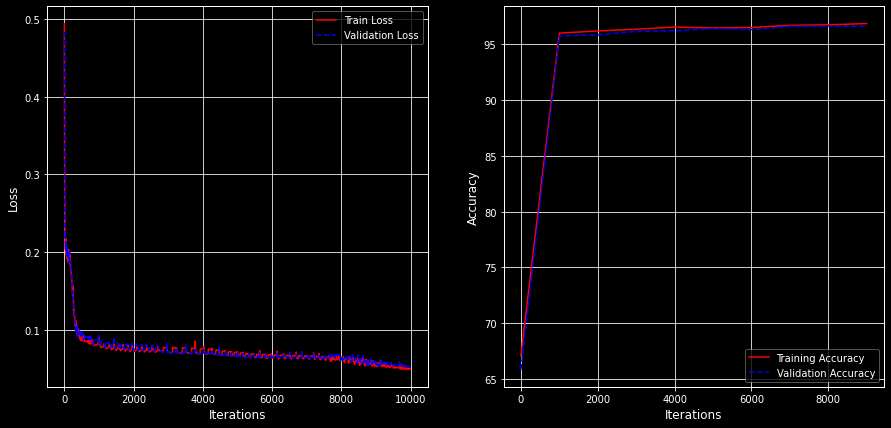

In [99]:
with plt.style.context('dark_background'):
  fig= plt.figure(figsize=(15,7))

  plt.subplot(1,2,1)
  plt.plot(iters1, train_loss, 'r', label="Train Loss")
  plt.plot(iters1, val_loss, 'b--', label="Validation Loss")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(iters2, train_acc, 'r', label="Training Accuracy")
  plt.plot(iters2, val_acc, 'b--', label="Validation Accuracy")
  plt.xlabel("Iterations")
  plt.ylabel("Accuracy")
  plt.legend()

**Conclusion**
> As you can see from the above results that we can predict the quality of wine as low, medium or high with an accuracy of almost 97%!